# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 6</center>

# <center>Linear Regression for Supervised Learning</center>

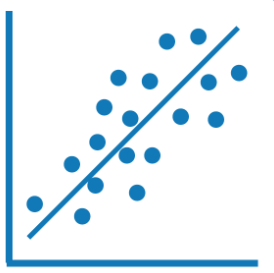

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading Data </li>
<li> Creating Simple Linear Model</li>
<li> Explore Linear Model attributes</li>
<li> Find MSE </li>
<li> Make Predictions for simple linear model</li>
<li> Create Multiple Linear Model </li>
<li> Make Predictions for multiple linear model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use sklearn library to create first machine learning model and implement sklearn LinearRegression model for both univariate and mulitple features.

By the end of the lab, you should be able to :
- Load required dataset and library for training machine learning model


- Implement sklearn LinearRegression algorithm for simple linear model as well as multiple linear model.


- Find MSE for the created model


- Make prediction for unseen data

## <font color = blue>1. Loading Data

    - Load boston housing data from sklearn.datasets module. Create dataframe from the boston data.

In [6]:
#solution
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()



dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [12]:
import pandas as pd
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [15]:
df['target'] = boston.target
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  Target  
0     15.3  396.90   4.98    24.0    24.0  
1     17.8  396.90   9.14    21.6    21.6  
2     17.8  392.83   4.03    34.7    34.7  
3     18.7  394.63   2.94    33.4    33.4  
4     18.7  396.90   5.33    36.2    36.2

In [21]:
df.drop("Target")

KeyError: "['Target'] not found in axis"

In [22]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  Target  
0     15.3  396.90   4.98    24.0    24.0  
1     17.8  396.90   9.14    21.6    21.6  
2     17.8  392.83   4.03    34.7    34.7  
3     18.7  394.63   2.94    33.4    33.4  
4     18.7  396.90   5.33    36.2    36.2

## <font color = blue>2. Creating simple Linear Model

INSTRUCTIONS:-
    
- The boston dataset contain many features. To implement simple linear regression model, let us choose any one feature that is mostly related to the target feature. 
    
    
- Use dataframe `corr()` method to check correlation between each features with target feature. Use heatmap to display the correlation.
    
    
- Which feature is mostly related to the target feature? Choose that feature to create linear Model.
    
    
- Import `LinearRegression()` from sklearn `linear_model` module. Create LinearRegression() object and fit the dataset to train the model


<AxesSubplot:>

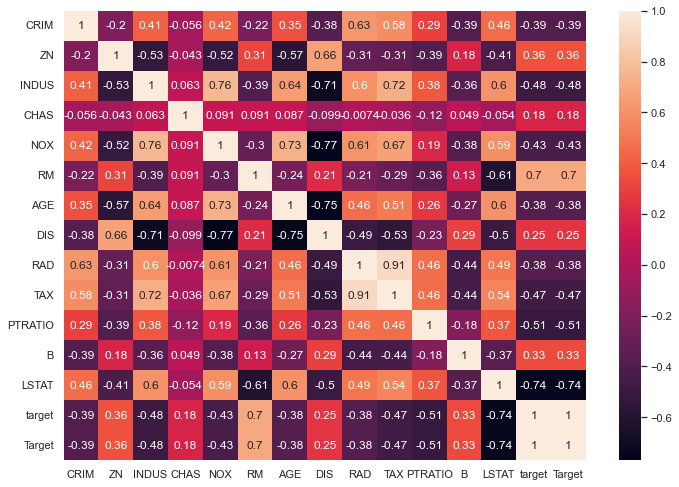

In [27]:
#Solution
import seaborn as sns
corr = df.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, annot=True)


In [28]:
df.drop(['Target'], axis=1)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   9.14    21.6  
2       17.8  392.83   4.03    34.7  
3       18.7  394.63   2.94    33.4  
4       18.7  396.90   5.33    36.2  
..       ...     ...    ...     ...  
501     21.0  391.99   9.67    22.4  
502     21.0  396.90   9.08    20.6  
503     21.0  396.90   5.64    23.9  
504     21.0  393.45   6.48    22.0  
505     21.0  396.90   7.88    11.9  

[506 rows x 14 columns]

In [33]:
#simple liner regression model
from sklearn.linear_model import LinearRegression
#create object/model
model = LinearRegression()
x = df[["RM"]]
y = df.target

#Train the model
model.fit(x,y)

LinearRegression()

## <font color = blue>3. Explore Linear Model attributes


In [34]:
#use coef_ attributes to get weights. We have only one weights since it is simple linear model
#finding w of wx+b
model.coef_



array([9.10210898])

In [35]:
#use intercept_ attributes to get the bias value
#finding b/intercept of  wx+b
model.intercept_



-34.67062077643857

In [37]:
model.predict([[6.575]])


C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.17574577])

## <font color = blue>4. Find MSE
- sklearn provides `mean_squared_error()` method to check MSE for a given model. `mean_squared_error()` expect y_prediction and actual y value as its paramters. use linear model's `predict()` method to get y_prediction.
    
 `sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)`

In [64]:
#creating y_pred
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x)
y_pred

MSE = mean_squared_error(y_pred,y)
MSE


43.60055177116956

## <font color = blue>5. Make Predictions


In [44]:
#Use predict method to make prediction to unseen data
x_sample = [[6],[7], [10]]
model.predict(x_sample)


C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.94203311, 29.04414209, 56.35046904])

## <font color = blue>6. Create Multiple Linear Regression Model

- Explore the Multiple Linear regression model choosing any number of features you are comfortable with. Remember you can use the same LinearRegression() algorithm.

In [91]:
#creatimg model
md = LinearRegression()
x_val = df[["RM","LSTAT", "TAX"]]
y_val = df.target

md.fit(x_val, y_val)

LinearRegression()

In [92]:
y_pre = md.predict(x_val)
y_pre

MeanSE = mean_squared_error(y_pre,y_val)
MeanSE

29.672227366021694

## <font color = blue>7. Make Prediction for Multi linear Model


In [89]:
#Solution
sample = [[5,7, 4]]
md.predict(sample)


C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.56103014])

# TODO/HOMEWORK : Creating Linear Model
- Create multiple Linear Regression model with the same features you chose in subtask 6 above. Use any feature scaling techniques to scale the features and train the model. 


- Explore the difference in the result when using unscaled and scaled features.

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardS = scaler.fit_transform(df)
sdf = pd.DataFrame(standardS, columns = df.columns)
sdf

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1   -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2   -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3   -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4   -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.413229 -0.487722  0.115738 -0.272599  0.158124  0.439316  0.018673   
502 -0.415249 -0.487722  0.115738 -0.272599  0.158124 -0.234548  0.288933   
503 -0.413447 -0.487722  0.115738 -0.272599  0.158124  0.984960  0.797449   
504 -0.407764 -0.487722  0.115738 -0.272599  0.158124  0.725672  0.736996   
505 -0.415000 -0.487722  0.115738 -0.272599  0.158124 -0.362767  0.434732   

          DIS       RAD       TAX   PTRATIO         B     LSTAT    target  \
0    0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686   
1    0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524   
2    0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247   
3    1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758   
4    1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.625796 -0.982843 -0.803212  1.176466  0.387217 -0.418147 -0.014454   
502 -0.716639 -0.982843 -0.803212  1.176466  0.441052 -0.500850 -0.210362   
503 -0.773684 -0.982843 -0.803212  1.176466  0.441052 -0.983048  0.148802   
504 -0.668437 -0.982843 -0.803212  1.176466  0.403225 -0.865302 -0.057989   
505 -0.613246 -0.982843 -0.803212  1.176466  0.441052 -0.669058 -1.157248   

       Target  
0    0.159686  
1   -0.101524  
2    1.324247  
3    1.182758  
4    1.487503  
..        ...  
501 -0.014454  
502 -0.210362  
503  0.148802  
504 -0.057989  
505 -1.157248  

[506 rows x 15 columns]

In [108]:
scale_md = LinearRegression()
x_val1 = sdf[["RM","LSTAT","TAX" ]]
y_val1 = sdf.target

scale_md.fit(x_val1, y_val1)

LinearRegression()

In [109]:
y_pre1 = md.predict(x_val1)
y_pre1

MeanSE = mean_squared_error(y_pre1,y_val1)
MeanSE

24.087415717109295

In [104]:
sample = [[5,7,9]]
md.predict(sample)


C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21.57253178])